# THE SPARKS FOUNDATION

# SEYJUTI BANERJEE : TASK-3 EXPLORATORY DATA ANALYSIS (RETAIL)

# OBJECTIVE : As a business manager, try to find out the weak areas where you can work to make more profit. What all business problems you can derive by exploring the data?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = "C:/Users/ADMIN/Downloads/SampleSuperstore.csv"
data = pd.read_csv(df)
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
# GETTING THE UNIQUE VALUES FROM THE POSSIBLE EXPLANATORY VARIABLES
df = data.copy()
df_dict = dict(zip([i for i in df.columns] , [pd.DataFrame(df[i].unique(), columns=[i]) for i in df.columns]))
columns = ['Ship Mode','Segment','Region','Category','Sub-Category']
for i in columns:
    display(df_dict[i])

,Ship Mode
0,Second Class
1,Standard Class
2,First Class
3,Same Day


,Segment
0,Consumer
1,Corporate
2,Home Office


,Region
0,South
1,West
2,Central
3,East


,Category
0,Furniture
1,Office Supplies
2,Technology


,Sub-Category
0,Bookcases
1,Chairs
2,Labels
3,Tables
4,Storage
5,Furnishings
6,Art
7,Phones
8,Binders
9,Appliances


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22700\1708371526.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask=np.array(df.corr())
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22700\1708371526.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),vmin=-1,vmax=1,square=True,annot=True,mask=mask,cmap='BrBG')


<Axes: title={'center': 'Upper Triangular Heatmap'}>

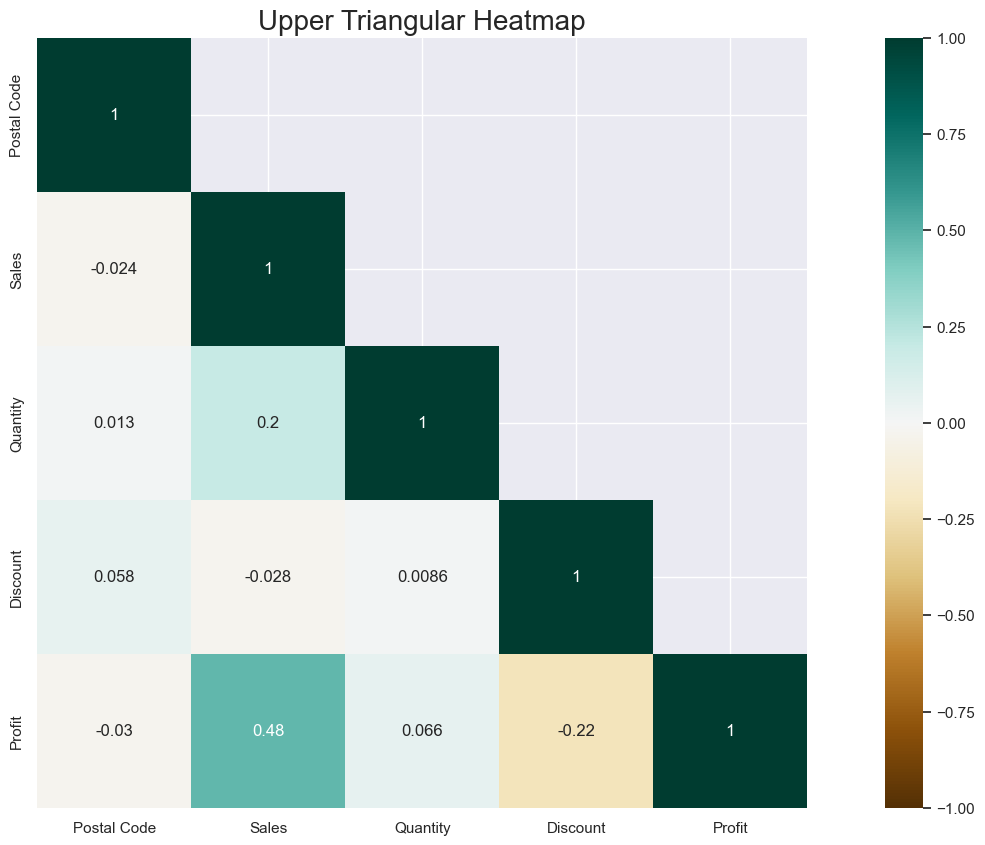

In [7]:
# CHECKING FOR CORRELATION
mask=np.array(df.corr())
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
ax.set_title('Upper Triangular Heatmap',fontsize=20)
fig.set_size_inches(20,10)
sns.heatmap(df.corr(),vmin=-1,vmax=1,square=True,annot=True,mask=mask,cmap='BrBG')

# As expected this Heatmap shows that Profit and Sales have moderate correlation.
# Now analysing the Profit made in each Region.

In [8]:
df2 = df.copy()
df2 = df2.pivot_table('Profit',columns='Region',aggfunc='sum')
df2

Region,Central,East,South,West
Profit,39706.3625,91522.78,46749.4303,108418.4489


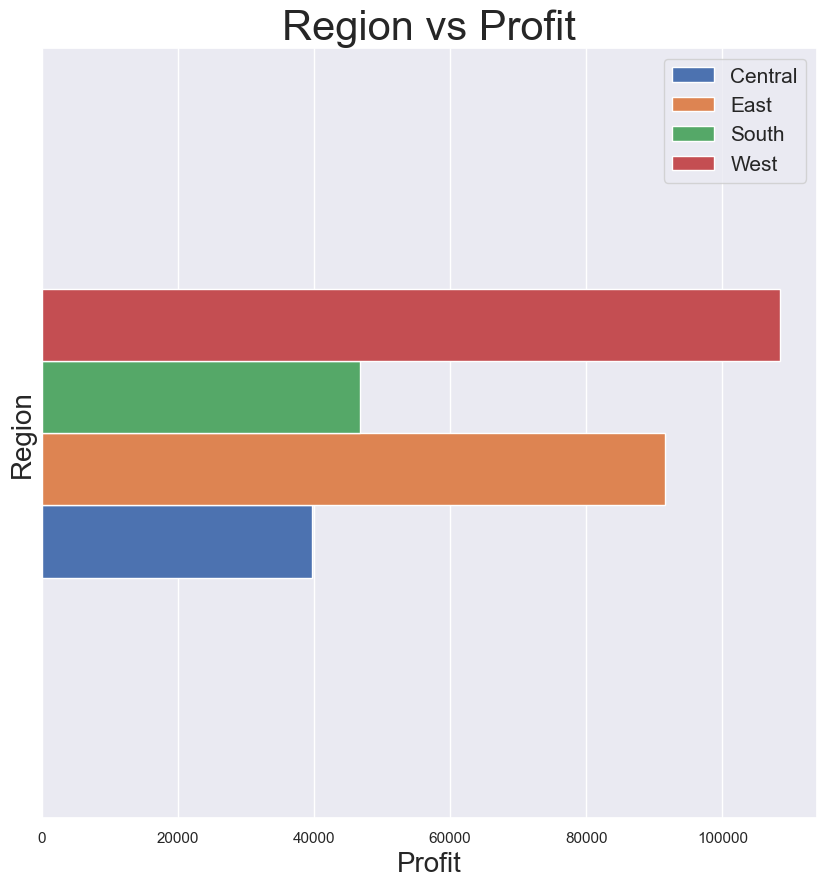

In [9]:
df2.reset_index(inplace=True,drop=True)
ax=df2.plot.barh(align='edge',width=0.3,figsize=(10,10))
ax.axes.yaxis.set_ticks([])
plt.xlabel('Profit',fontsize=20)
plt.ylabel('Region',fontsize=20)
plt.title('Region vs Profit',fontsize=30)
plt.legend(prop={'size': 15})
plt.show()

# This plot shows that the Profit contribution of the Region 'South' and 'Central' is low when compared to 'East' and 'West', hence this indirectly tells us that the Sales in that region is low

# Since Discount rate is a key incentive for customers to buy a product, it will be worthwhile to analyse the discount on each product grouped by region

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22700\1414015514.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.barplot(x='Sub-Category',y='Discount_value',hue='Region',data=df4,ci=None)


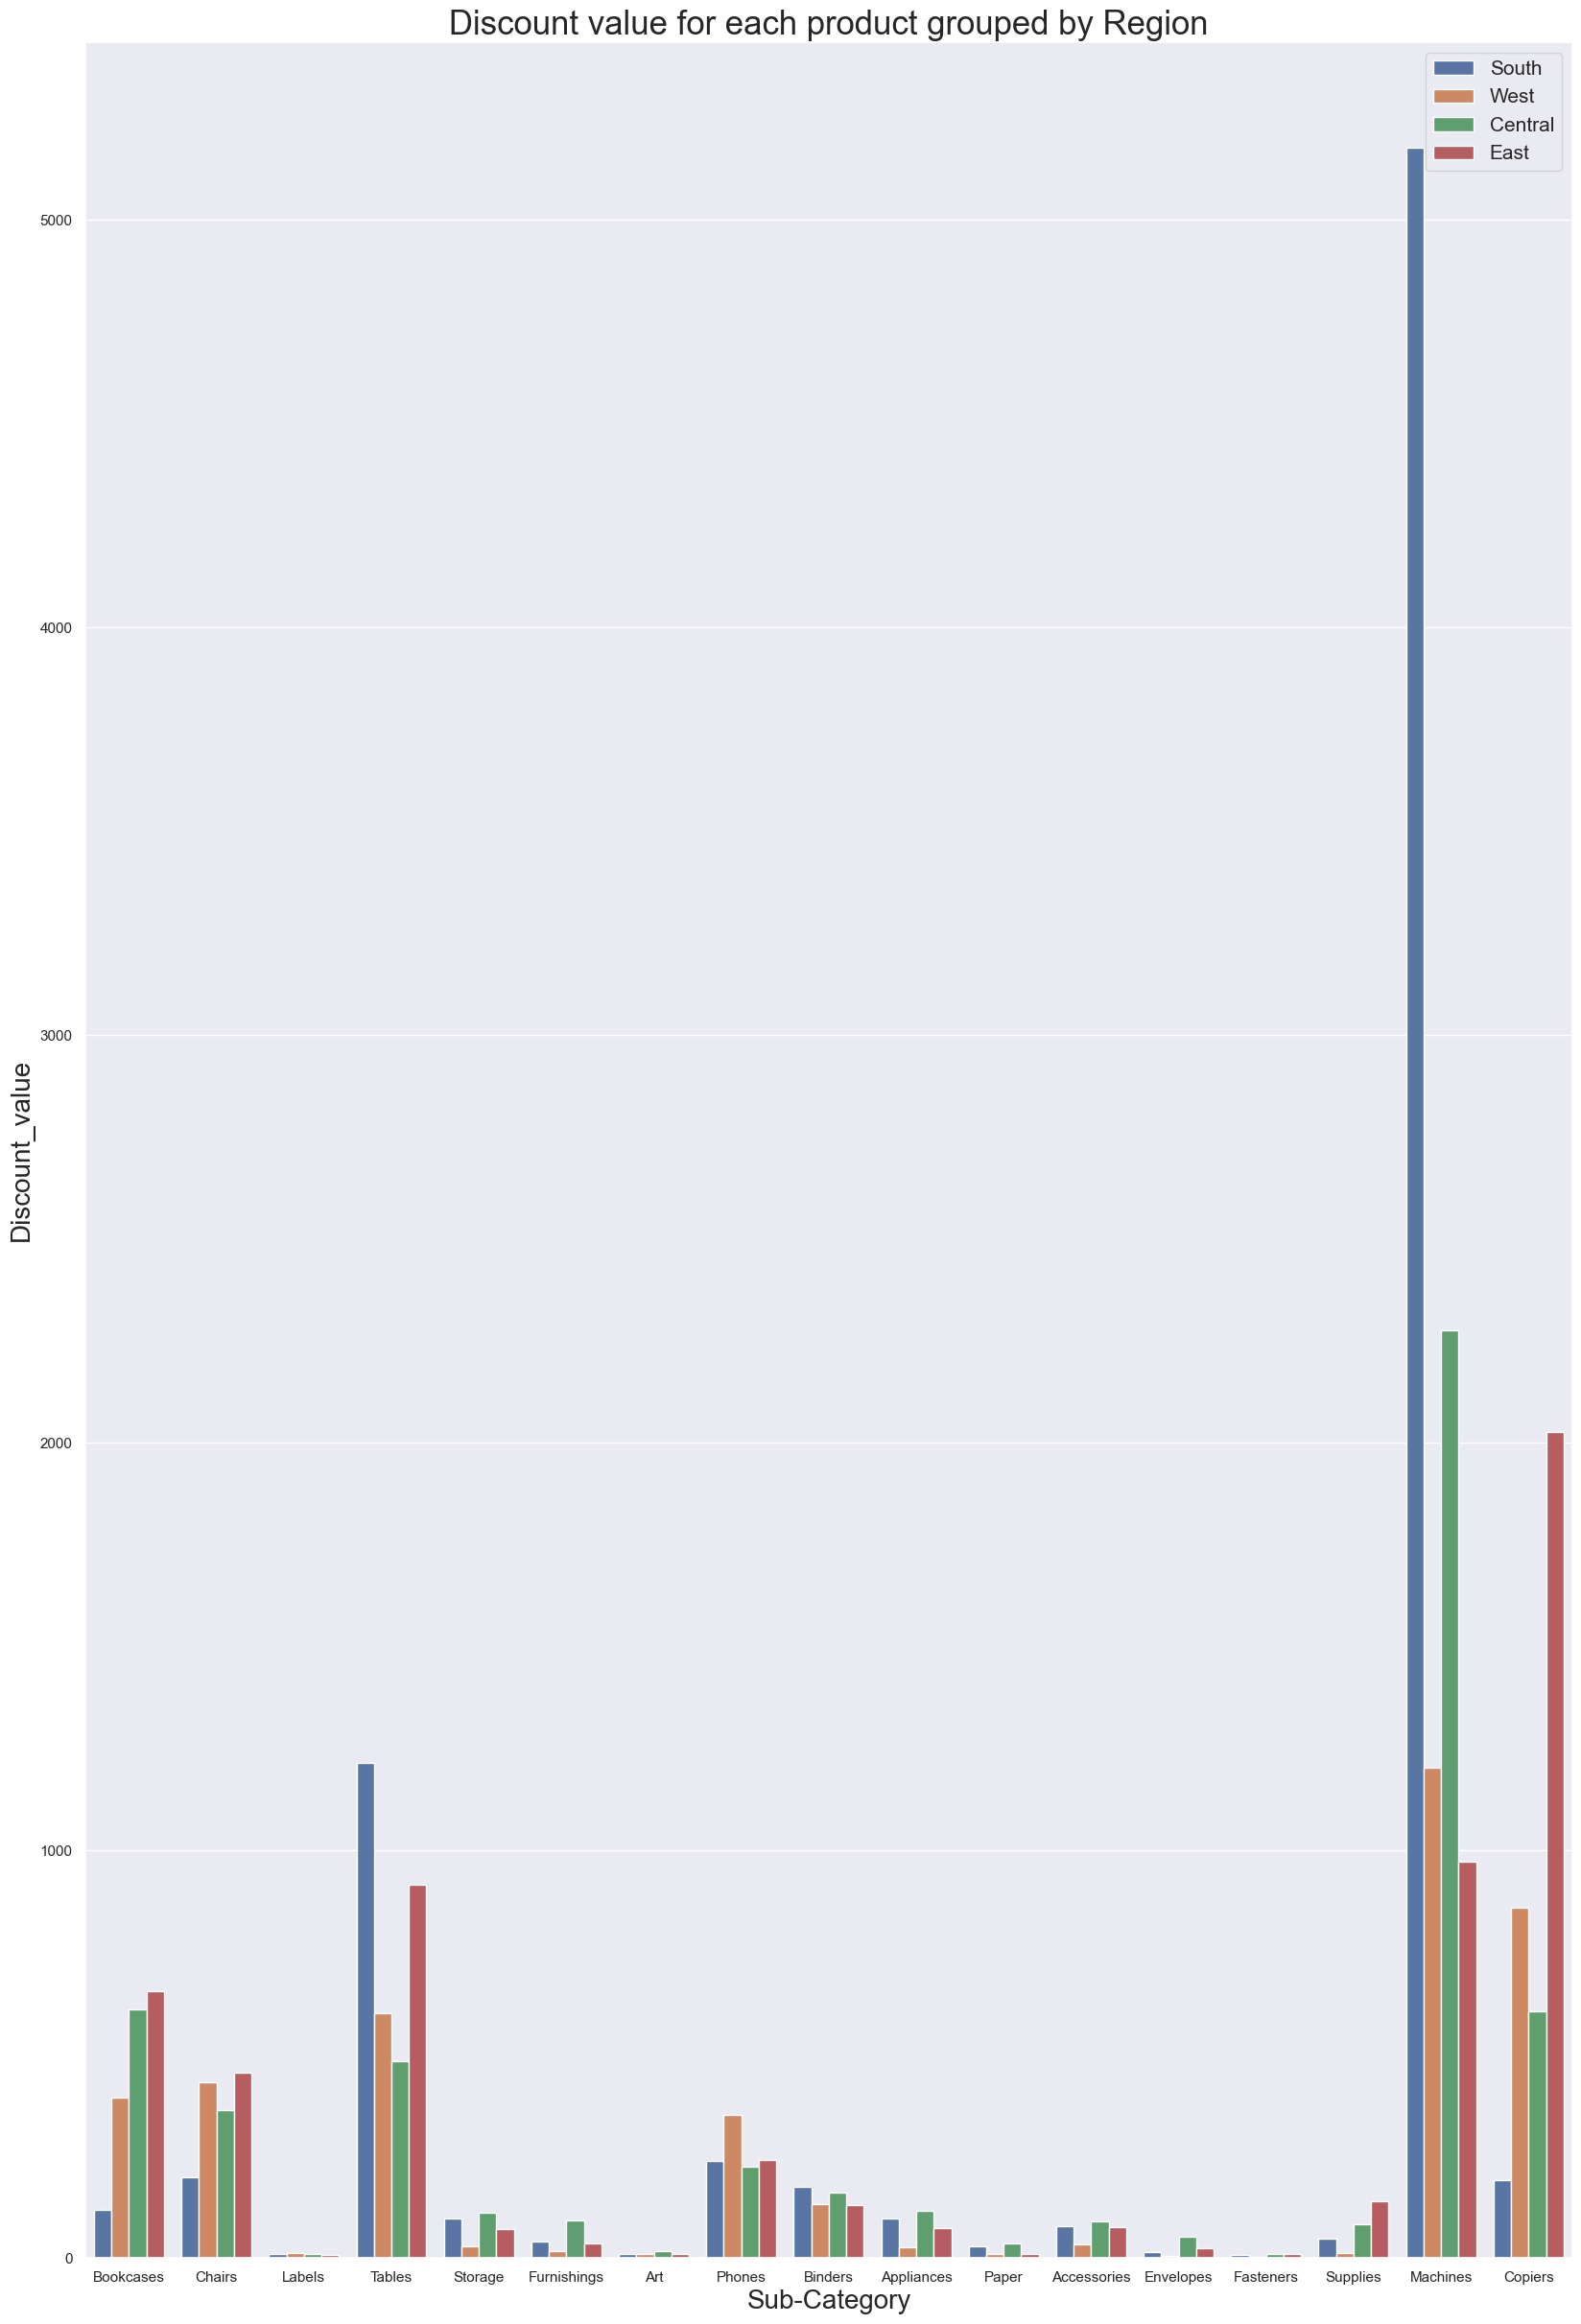

In [10]:
df4 = df.copy()
df4['Discount_value'] = (df4['Sales'] * df4['Quantity']) * df4['Discount'] 
plt.figure(figsize=(20,30))
ax=sns.barplot(x='Sub-Category',y='Discount_value',hue='Region',data=df4,ci=None)
ax.set_ylabel('Discount_value',fontsize=20)
ax.set_xlabel('Sub-Category',fontsize=20) 
plt.legend(prop={'size': 15})
plt.title('Discount value for each product grouped by Region',fontsize=25)
plt.show()

In [11]:
df3 = df.copy()
df3['Sales'] = df['Sales'] * df['Quantity']
df3=df3.groupby(['Category'])['Sales'].sum()
df3 = pd.DataFrame(df3)
df3

,Sales
Category,
Furniture,3.859215e+06
Office Supplies,3.548585e+06
Technology,4.080262e+06


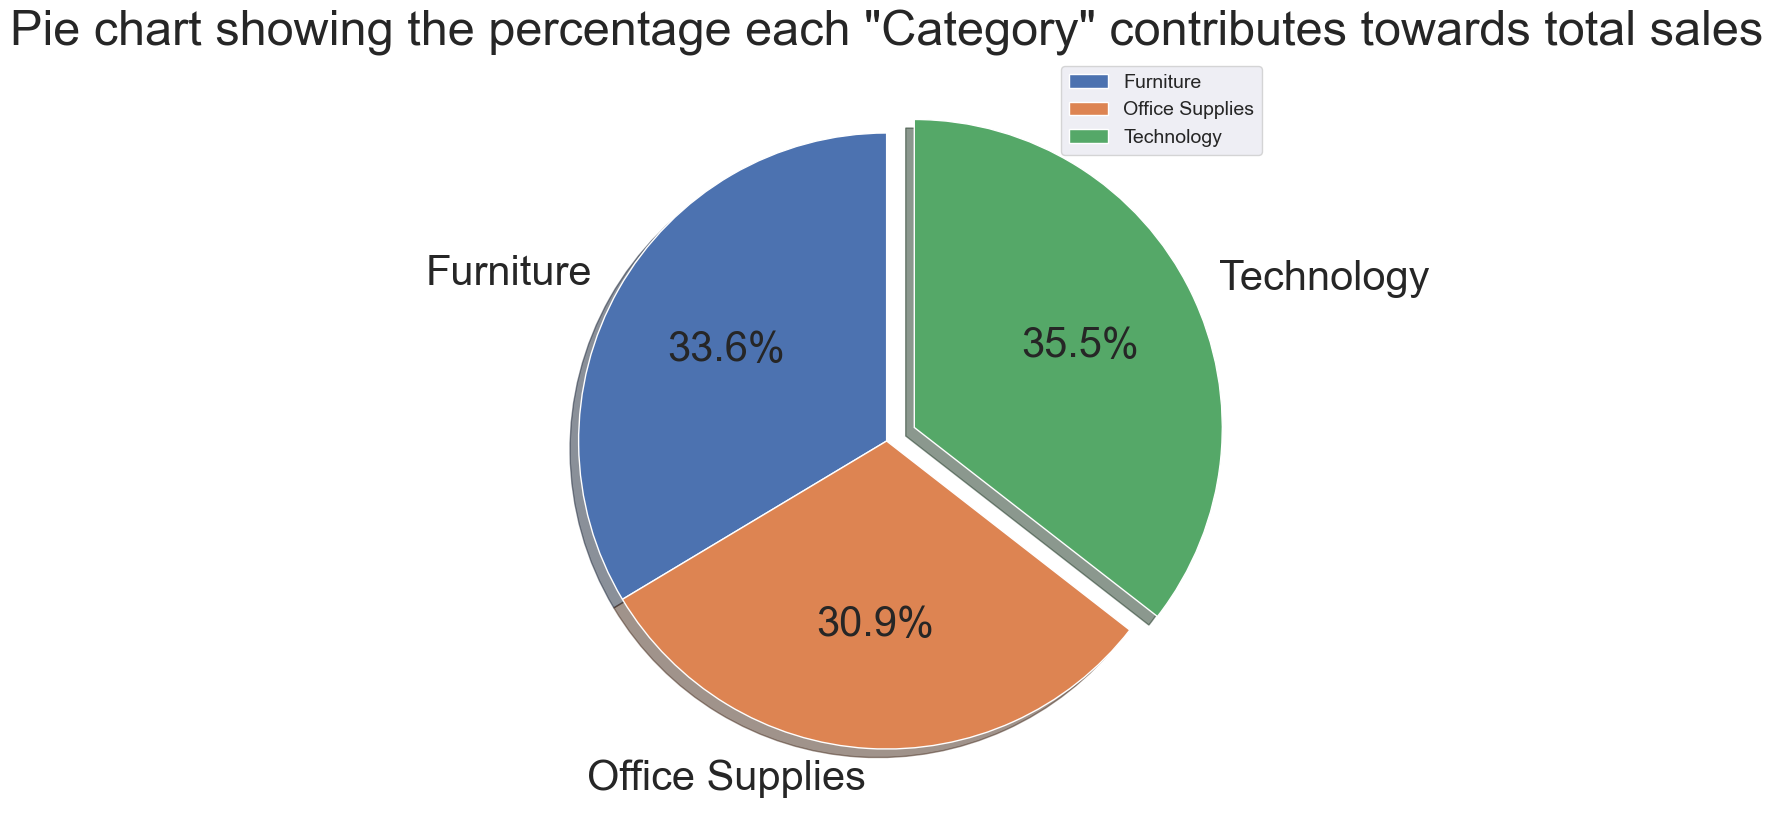

In [12]:
explode = (0, 0, 0.1)
ax=df3.plot(kind='pie',shadow = True,y='Sales', startangle=90,figsize=(15,10),autopct='%1.1f%%',explode=explode,fontsize=30)
ax.set_title('Pie chart showing the percentage each "Category" contributes towards total sales',fontsize=35)
ax.set_ylabel('')
plt.legend(loc='upper right',prop={'size': 14})

In [13]:
df5 = df.copy()
df5=df5.groupby(['Ship Mode']).count().reset_index()
df5.drop(df5.columns.difference(['Ship Mode','Segment']), 1, inplace=True)
df5.loc[len(df.index)] = ['',0] 
df5.reset_index(drop=True)
df6=df5.sort_values(by=['Segment'])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22700\3944918062.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df5.drop(df5.columns.difference(['Ship Mode','Segment']), 1, inplace=True)


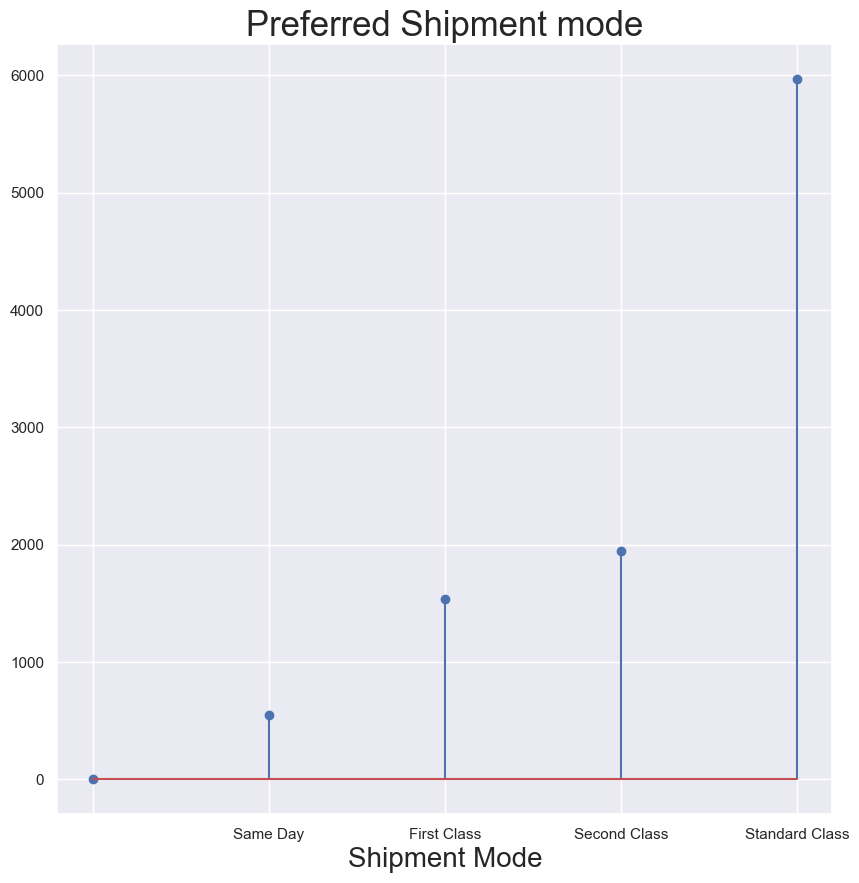

In [17]:
my_range=range(0,len(df6['Ship Mode']))
plt.figure(figsize=(10,10))
plt.stem(df6['Segment'])
plt.xticks(my_range,df6['Ship Mode'])
plt.xlabel('Shipment Mode',fontsize=20)
plt.title('Preferred Shipment mode',fontsize=25)
plt.show()

In [18]:
df7 = df.copy()
df7['Sales'] = df7['Sales'] * df['Quantity']
df7=df7.groupby(['Segment'])['Sales'].sum()
df7 = pd.DataFrame(df7)
df7

,Sales
Segment,
Consumer,5.819347e+06
Corporate,3.516108e+06
Home Office,2.152607e+06


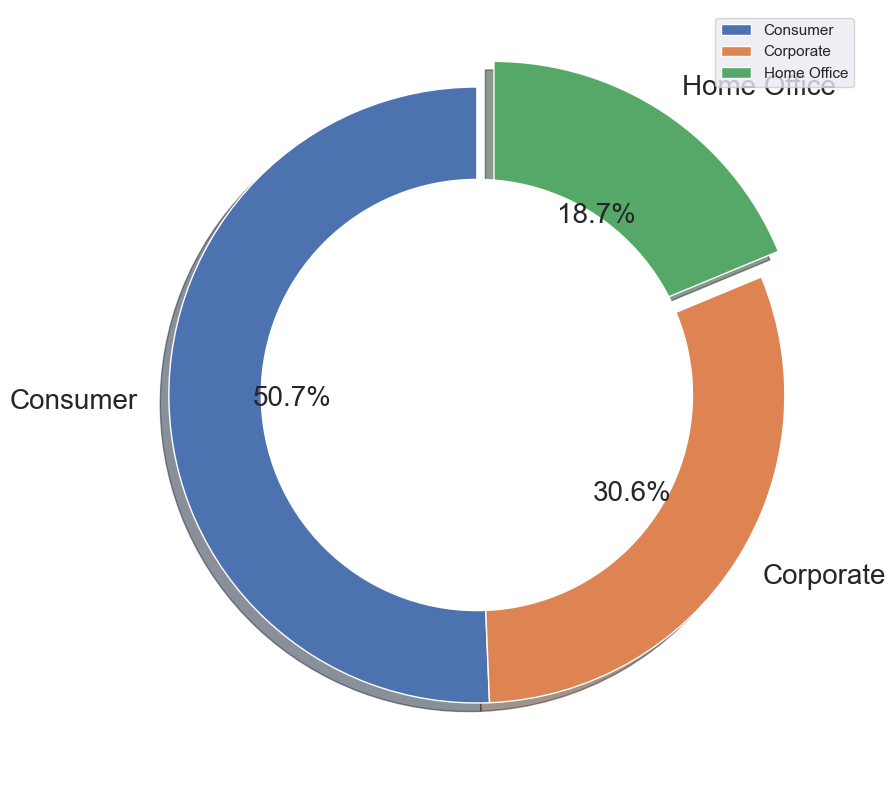

In [19]:
explode=(0,0,0.1)
ax=df7.plot(kind='pie',shadow = True,y='Sales', startangle=90,figsize=(15,10),autopct='%1.1f%%',explode=explode,fontsize=20)
my_circle = plt.Circle((0,0),0.7,color='white')
cir = plt.gcf()
cir.gca().add_artist(my_circle)
ax.set_ylabel('')
plt.show()